In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Load the dataset
df = pd.read_csv('C:/Users/Admin/Desktop/Final Exam prep/urbanandruralpopulation new.csv')

# Display first few rows of the dataset
print(df)

# To ignore all warnings
warnings.filterwarnings('ignore')

           country Code country  Year  Urban population Rural population
0      Afghanistan          AFG  1960            724373          7898093
1      Afghanistan          AFG  1961            763336          8026804
2      Afghanistan          AFG  1962            805062          8163985
3      Afghanistan          AFG  1963            849446          8308019
4      Afghanistan          AFG  1964            896820          8458694
...            ...          ...   ...               ...              ...
14163     Zimbabwe          ZWE  2017           4755312          9995789
14164     Zimbabwe          ZWE  2018           4848158         10204026
14165     Zimbabwe          ZWE  2019           4945719         10408889
14166     Zimbabwe          ZWE  2020           5052214         10617452
14167     Zimbabwe          ZWE  2021           5166388         10827136

[14168 rows x 5 columns]


In [10]:
# Check for missing values and general info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14168 entries, 0 to 14167
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           14168 non-null  object
 1   Code country      14168 non-null  object
 2   Year              14168 non-null  int64 
 3   Urban population  14168 non-null  int64 
 4   Rural population  14168 non-null  object
dtypes: int64(2), object(3)
memory usage: 553.6+ KB
None
               Year  Urban population
count  14168.000000      1.416800e+04
mean    1990.533879      5.097131e+07
std       17.895499      2.442102e+08
min     1960.000000      8.590000e+02
25%     1975.000000      2.385732e+05
50%     1991.000000      2.029394e+06
75%     2006.000000      8.821502e+06
max     2021.000000      4.454153e+09


In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
country             0
Code country        0
Year                0
Urban population    0
Rural population    0
dtype: int64


In [12]:
# Drop rows where any column has NaN values (optional: you can choose to fill them with mean or median if needed)
df = df.dropna()
df

country Code country  Year  Urban population Rural population
0      Afghanistan          AFG  1960            724373          7898093
1      Afghanistan          AFG  1961            763336          8026804
2      Afghanistan          AFG  1962            805062          8163985
3      Afghanistan          AFG  1963            849446          8308019
4      Afghanistan          AFG  1964            896820          8458694
...            ...          ...   ...               ...              ...
14163     Zimbabwe          ZWE  2017           4755312          9995789
14164     Zimbabwe          ZWE  2018           4848158         10204026
14165     Zimbabwe          ZWE  2019           4945719         10408889
14166     Zimbabwe          ZWE  2020           5052214         10617452
14167     Zimbabwe          ZWE  2021           5166388         10827136

[14168 rows x 5 columns]

In [13]:
# Confirm no missing values remain
print(df.isnull().sum())

country             0
Code country        0
Year                0
Urban population    0
Rural population    0
dtype: int64


In [14]:
# Ensure columns have the correct data types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Urban population'] = pd.to_numeric(df['Urban population'], errors='coerce')
df['Rural population'] = pd.to_numeric(df['Rural population'], errors='coerce')

# Drop rows with any invalid data (e.g., non-numeric Year, populations)
df = df.dropna(subset=['Year', 'Urban population', 'Rural population'])
df

country Code country  Year  Urban population  Rural population
0      Afghanistan          AFG  1960            724373         7898093.0
1      Afghanistan          AFG  1961            763336         8026804.0
2      Afghanistan          AFG  1962            805062         8163985.0
3      Afghanistan          AFG  1963            849446         8308019.0
4      Afghanistan          AFG  1964            896820         8458694.0
...            ...          ...   ...               ...               ...
14163     Zimbabwe          ZWE  2017           4755312         9995789.0
14164     Zimbabwe          ZWE  2018           4848158        10204026.0
14165     Zimbabwe          ZWE  2019           4945719        10408889.0
14166     Zimbabwe          ZWE  2020           5052214        10617452.0
14167     Zimbabwe          ZWE  2021           5166388        10827136.0

[14167 rows x 5 columns]

In [15]:
# Summary statistics for the population columns
urban_mean = df['Urban population'].mean()
rural_mean = df['Rural population'].mean()
urban_median = df['Urban population'].median()
rural_median = df['Rural population'].median()
urban_std = df['Urban population'].std()
rural_std = df['Rural population'].std()

print(f'Urban Population - Mean: {urban_mean}, Median: {urban_median}, Std: {urban_std}')
print(f'Rural Population - Mean: {rural_mean}, Median: {rural_median}, Std: {rural_std}')


Urban Population - Mean: 50974892.10404461, Median: 2029477.0, Std: 244218460.55891547
Rural Population - Mean: 61943556.39514435, Median: 2232128.0, Std: 297402199.20446473


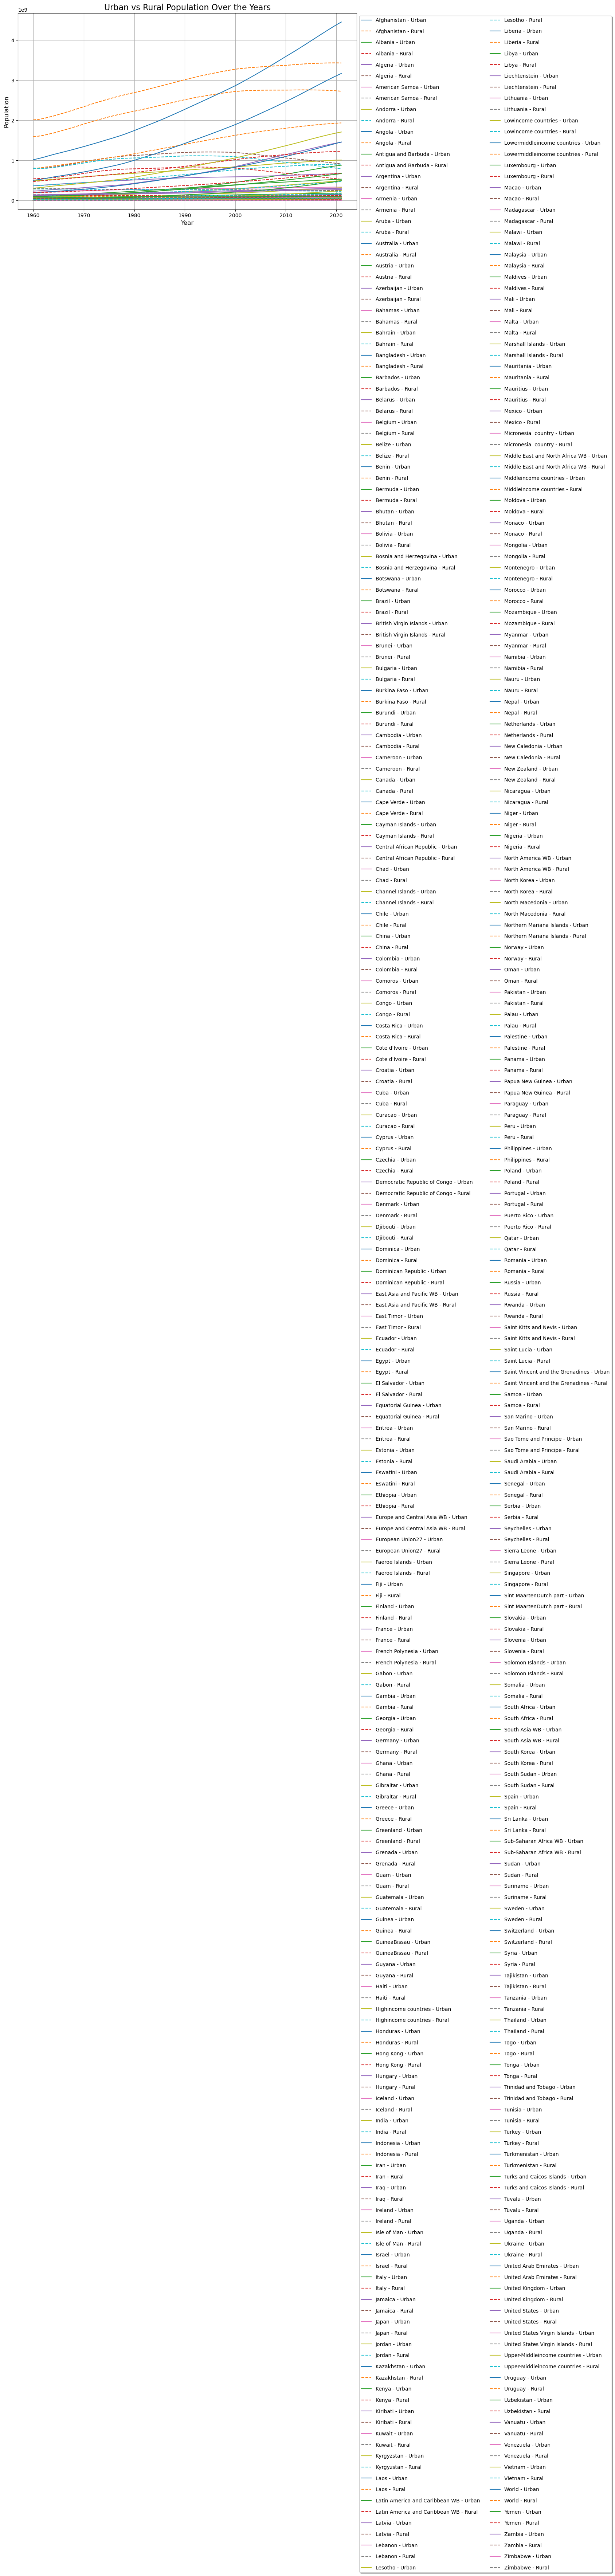

In [17]:
# Line plot to show the trend of urban and rural population over the years
plt.figure(figsize=(12,7))

for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.plot(country_data['Year'], country_data['Urban population'], label=f'{country} - Urban', linewidth=1.5)
    plt.plot(country_data['Year'], country_data['Rural population'], label=f'{country} - Rural', linestyle='--', linewidth=1.5)

# Set the title and labels
plt.title('Urban vs Rural Population Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population', fontsize=12)

# Customize the legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=2, fancybox=True, shadow=True, labelspacing=1.2)

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout() 
plt.show()

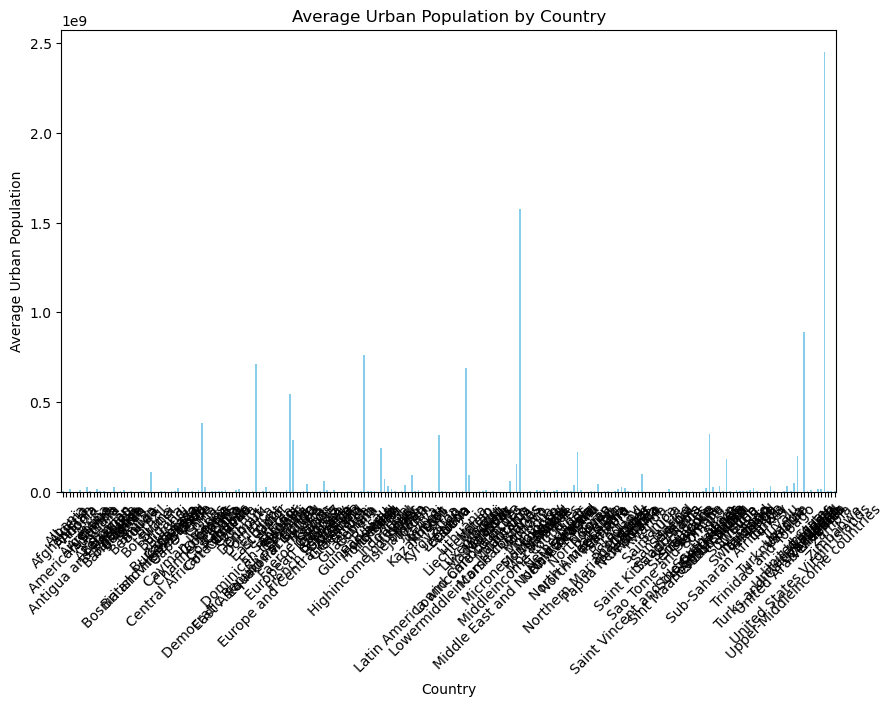

In [18]:
# 2. Bar plot of the average urban population by country
plt.figure(figsize=(10,6))
df.groupby('country')['Urban population'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Urban Population by Country')
plt.ylabel('Average Urban Population')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

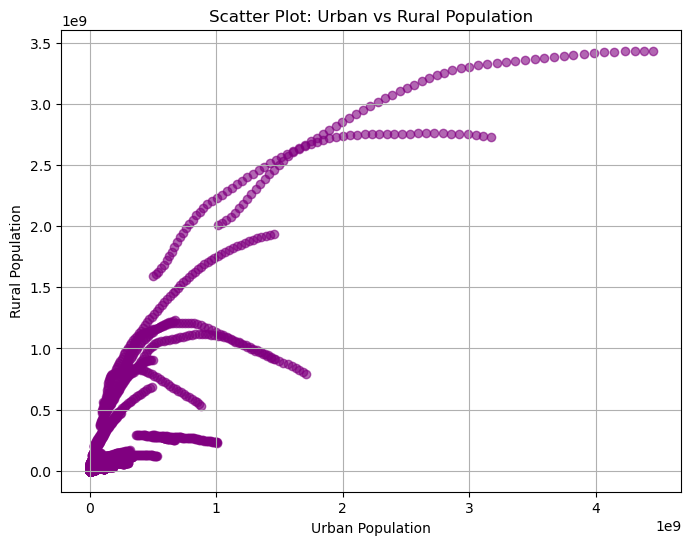

In [19]:
# 3. Scatter plot to identify correlation between urban and rural population
plt.figure(figsize=(8,6))
plt.scatter(df['Urban population'], df['Rural population'], alpha=0.6, color='purple')
plt.title('Scatter Plot: Urban vs Rural Population')
plt.xlabel('Urban Population')
plt.ylabel('Rural Population')
plt.grid(True)
plt.show()

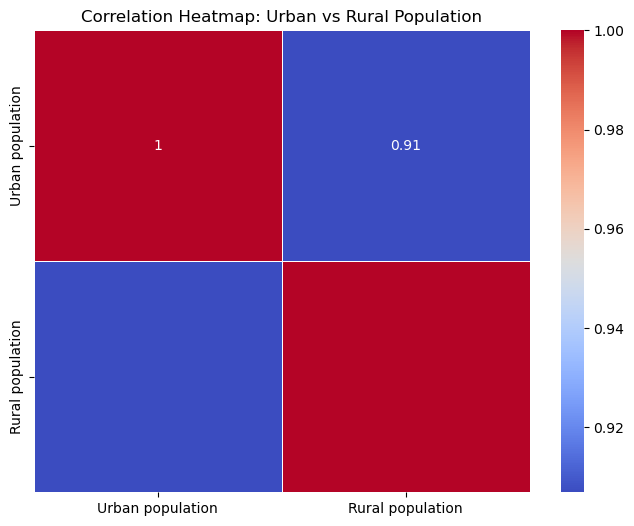

In [20]:
# 4. Heatmap for population correlation (Urban vs Rural)
plt.figure(figsize=(8,6))
corr = df[['Urban population', 'Rural population']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap: Urban vs Rural Population')
plt.show()

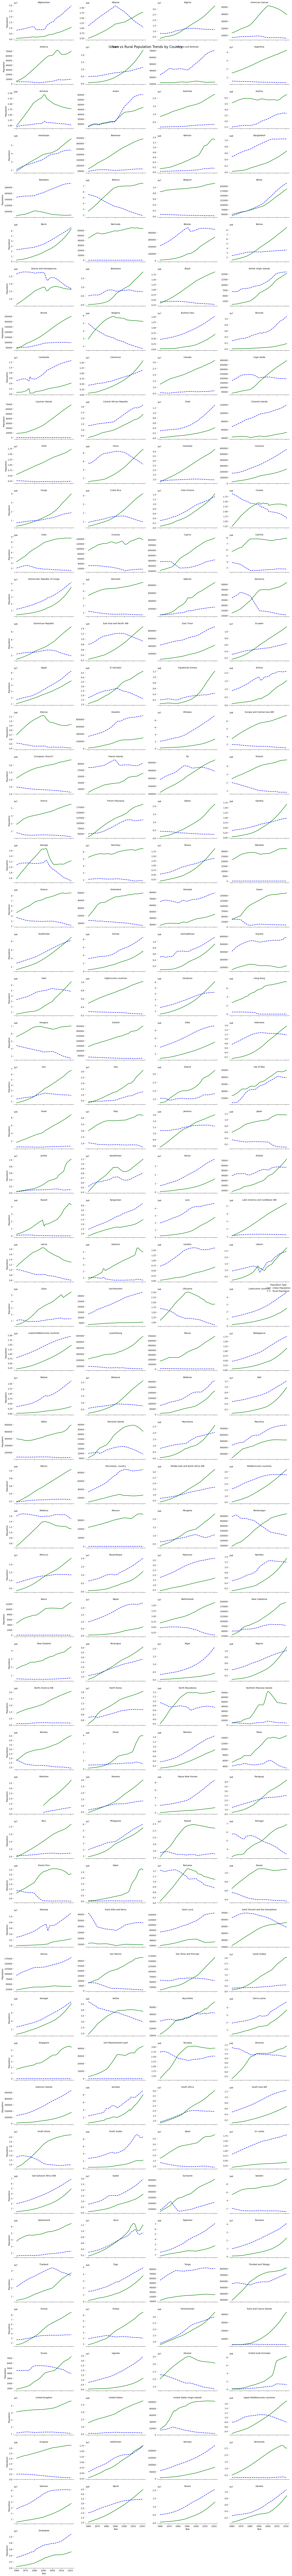

In [22]:
# Create the FacetGrid with advanced aesthetics
g = sns.FacetGrid(df, col='country', col_wrap=4, height=3, aspect=1.5, sharey=False)

# Map urban and rural population trends to the grid, using different colors and line styles
g.map(sns.lineplot, 'Year', 'Urban population', color='green', label='Urban Population', linewidth=2)
g.map(sns.lineplot, 'Year', 'Rural population', color='blue', label='Rural Population', linestyle='--', linewidth=2)
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Population")
g.despine(left=True)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Urban vs Rural Population Trends by Country', fontsize=16)
g.add_legend(title="Population Type", adjust_subtitles=True)
plt.tight_layout()

# Display the final plot
plt.show()

In [23]:
# Finding countries with the highest population density in urban areas (for demonstration purposes, we'll assume population density is closely related to urban population)
highest_urban_pop = df.groupby('country')['Urban population'].max().sort_values(ascending=False).head(5)
print("Top 5 Countries with Highest Urban Population:\n", highest_urban_pop)


Top 5 Countries with Highest Urban Population:
 country
World                           4454152526
Middleincome countries          3171431812
Upper-Middleincome countries    1710307508
Lowermiddleincome countries     1461124304
East Asia and Pacific WB        1457042236
Name: Urban population, dtype: int64


In [24]:
# Finding years where the gap between urban and rural populations is largest
df['population_gap'] = abs(df['Urban population'] - df['Rural population'])
largest_gap = df[df['population_gap'] == df['population_gap'].max()]
print(f"Largest gap between Urban and Rural populations: \n {largest_gap[['country', 'Year', 'Urban population', 'Rural population', 'population_gap']]}")


Largest gap between Urban and Rural populations: 
                      country  Year  Urban population  Rural population  \
8387  Middleincome countries  1977         898567955      2.150236e+09   

      population_gap  
8387    1.251668e+09  
